# Hydrauliikkadatan korruptointi ja visualisointi

Tämä notebook sisältää kaksi pääosiota:
1. Datan korruptointi - lisätään keinotekoisesti virheitä ja puuttuvia arvoja
2. Korruptoidun datan visualisointi - analysoidaan ja visualisoidaan datan ongelmat

## Tarvittavat kirjastot
- pandas: Datan käsittely ja analysointi
- numpy: Numeeriset operaatiot ja satunnaislukujen generointi
- os: Tiedostopolkujen käsittely
- matplotlib ja seaborn: Datan visualisointi
- gridspec: Kuvaajien asettelun hallinta

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## 1. Datan korruptointi

Tässä osiossa lisäämme dataan keinotekoisesti:
- Puuttuvia arvoja (NaN) vähintään 4 per sarake, yhteensä 40
- Outlier-arvoja:
  * pumpControl: negatiivisia tai >100
  * pressure: negatiivisia

### 1.1 Datan lataus ja tiedostopolkujen määritys

In [2]:
# Määritä tiedostopolut suhteellisina polkuina
inputFile = '../Data/hydraulicData.csv'
outputFile = '../Data/corruptedHydraulicData.csv'

# Lue data
print(f"Luetaan data tiedostosta: {inputFile}")
df = pd.read_csv(inputFile)
print(f"Data luettu onnistuneesti: {inputFile}")

Luetaan data tiedostosta: ../Data/hydraulicData.csv
Data luettu onnistuneesti: ../Data/hydraulicData.csv


### 1.2 Puuttuvien arvojen lisääminen

Lisätään puuttuvia arvoja (NaN) eri sarakkeisiin seuraavasti:
- pumpControl: 16 puuttuvaa arvoa (40% puuttuvista)
- pressure: 14 puuttuvaa arvoa (35% puuttuvista)
- state: 10 puuttuvaa arvoa (25% puuttuvista)

Puuttuvat arvot valitaan satunnaisesti eri riveiltä.

In [3]:
print("Lisätään puuttuvia arvoja...")
# Määritä puuttuvien arvojen määrät per sarake (yhteensä 40)
missing_counts = {
    'pumpControl': 16,    # Eniten puuttuvia
    'pressure': 14,       # Toiseksi eniten
    'state': 10          # Vähiten puuttuvia
}

for column, count in missing_counts.items():
    # Valitse satunnaiset rivit
    random_indices = np.random.choice(df.index, size=count, replace=False)
    df.loc[random_indices, column] = np.nan

print("Puuttuvat arvot lisätty...")

Lisätään puuttuvia arvoja...
Puuttuvat arvot lisätty...


### 1.3 Outlier-arvojen lisääminen

Lisätään dataan epärealistisia arvoja:
1. pumpControl:
   - 12 negatiivista arvoa väliltä -10...-1
   - 12 liian suurta arvoa väliltä 101...110
2. pressure:
   - 8 negatiivista arvoa väliltä -10...-1

Nämä arvot auttavat testaamaan datan puhdistusalgoritmin toimintaa.

In [4]:
print("Lisätään outlier-arvoja...")
# pumpControl outlierit (negatiivisia tai >100)
outlier_indices = np.random.choice(df.index, size=24, replace=False)
for idx in outlier_indices[:12]:
    df.loc[idx, 'pumpControl'] = np.random.uniform(-10, -1)
for idx in outlier_indices[12:]:
    df.loc[idx, 'pumpControl'] = np.random.uniform(101, 110)

# pressure outlierit (negatiivisia)
pressure_outlier_indices = np.random.choice(df.index, size=8, replace=False)
for idx in pressure_outlier_indices:
    df.loc[idx, 'pressure'] = np.random.uniform(-10, -1)

print("Outlier-arvot lisätty...")

# Tallenna korruptoitu data
df.to_csv(outputFile, index=False)
print(f"Korruptoitu data tallennettu: {outputFile}")

Lisätään outlier-arvoja...
Outlier-arvot lisätty...
Korruptoitu data tallennettu: ../Data/corruptedHydraulicData.csv


## 2. Korruptoidun datan visualisointi

### Visualisoinnin tavoitteet:
1. Puuttuvien arvojen määrän ja sijainnin havainnollistaminen
2. Poikkeavien arvojen tunnistaminen ja visualisointi
3. Datan laadun kokonaiskuvan muodostaminen

### Käytetyt visualisointimenetelmät:
1. Pylväsdiagrammit puuttuville arvoille
2. Boxplot-kuvaajat poikkeavien arvojen tunnistamiseen
3. Swarmplot-kuvaajat datan jakauman visualisointiin

### 2.1 Visualisoinnin valmistelu

In [5]:
# Tyyliasetukset
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_context("talk")

# Väripaletti
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Luodaan kuva
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.4, wspace=0.3)

<Figure size 2000x1600 with 0 Axes>

### 2.2 Puuttuvien arvojen visualisointi

Visualisoidaan puuttuvat arvot pylväsdiagrammina, jossa näkyy:
- Puuttuvien arvojen määrä per sarake
- Rivien indeksit, joissa arvot puuttuvat

Kuvaaja tallennettu ../Visualization/corruptedMissingValues.png


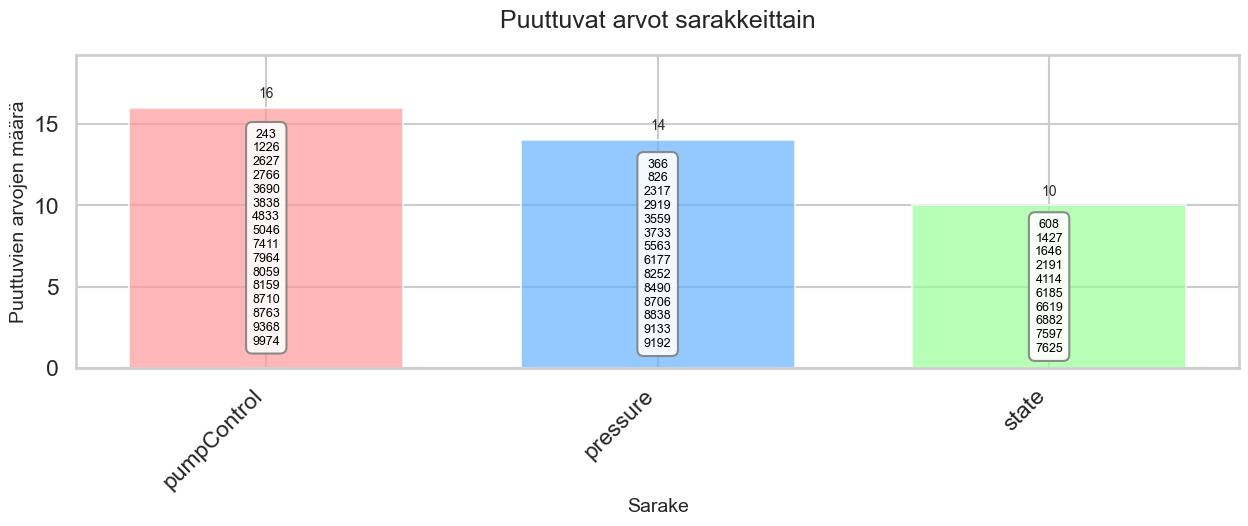

In [6]:
# 1. Puuttuvat arvot pylväsdiagrammina
plt.figure(figsize=(15, 10))  # Kasvatetaan korkeutta 8 -> 10

# Määritellään GridSpec uudelleen suuremmilla väleillä
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.4, wspace=0.3)

ax1 = plt.subplot(gs[0, :])  # Vie koko ylärivi
missingCounts = df.isnull().sum()

# Luo pylväsdiagrammi
bars = ax1.bar(range(len(missingCounts)), missingCounts, 
               color=colors, alpha=0.7, width=0.7)  # Kavennetaan pylväitä hieman

# Lisää sarakkeiden nimet
ax1.set_xticks(range(len(missingCounts)))
ax1.set_xticklabels(missingCounts.index, rotation=45, ha='right')

# Lisää puuttuvien arvojen indeksit pylväisiin
for idx, (column, count) in enumerate(missingCounts.items()):
    if count > 0:
        # Etsi puuttuvien arvojen indeksit
        missingIndices = df[df[column].isnull()].index.tolist()
        missingIndices.sort()
        
        # Muotoile indeksit tekstiksi
        indicesText = "\n".join(map(str, missingIndices))
        
        # Lisää teksti pylvääseen valkoisella taustalla
        bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.9)
        ax1.text(idx, count/2, indicesText, ha='center', va='center',
                fontsize=9, color='black', bbox=bbox_props)

# Suurennetaan otsikkoa ja akselien tekstejä
ax1.set_title('Puuttuvat arvot sarakkeittain', fontsize=18, pad=20)
ax1.set_xlabel('Sarake', fontsize=14)
ax1.set_ylabel('Puuttuvien arvojen määrä', fontsize=14)

# Lisätään marginaalia ylös ja alas
ax1.margins(y=0.2)

"""Lisää arvot pylväisiin"""
for rect in ax1.patches:
    yValue = rect.get_height()
    xValue = rect.get_x() + rect.get_width()/2

    label = f"{int(yValue)}"
    
    ax1.annotate(label, (xValue, yValue), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom',
                fontsize=10)

# Säädetään kuvaajan marginaaleja
plt.subplots_adjust(top=0.9, bottom=0.15)

# Tallennetaan kuvaaja
plt.savefig('../Visualization/corruptedMissingValues.png', bbox_inches='tight', dpi=300)
print("Kuvaaja tallennettu ../Visualization/corruptedMissingValues.png")

### 2.3 PumpControl ja Pressure outlierien visualisointi

Visualisoidaan pumpControl-sarakkeen outlierit:
- Boxplot näyttää jakauman
- Swarmplot näyttää yksittäiset poikkeavat arvot
- Vihreä alue näyttää sallitun vaihteluvälin (0-100)

Visualisoidaan pressure-sarakkeen outlierit:
- Boxplot näyttää jakauman
- Swarmplot näyttää yksittäiset poikkeavat arvot (negatiiviset)
- Vihreä alue näyttää sallitun vaihteluvälin (>0)

Kuvaaja tallennettu ../Visualization/corruptedOutliersValues.png


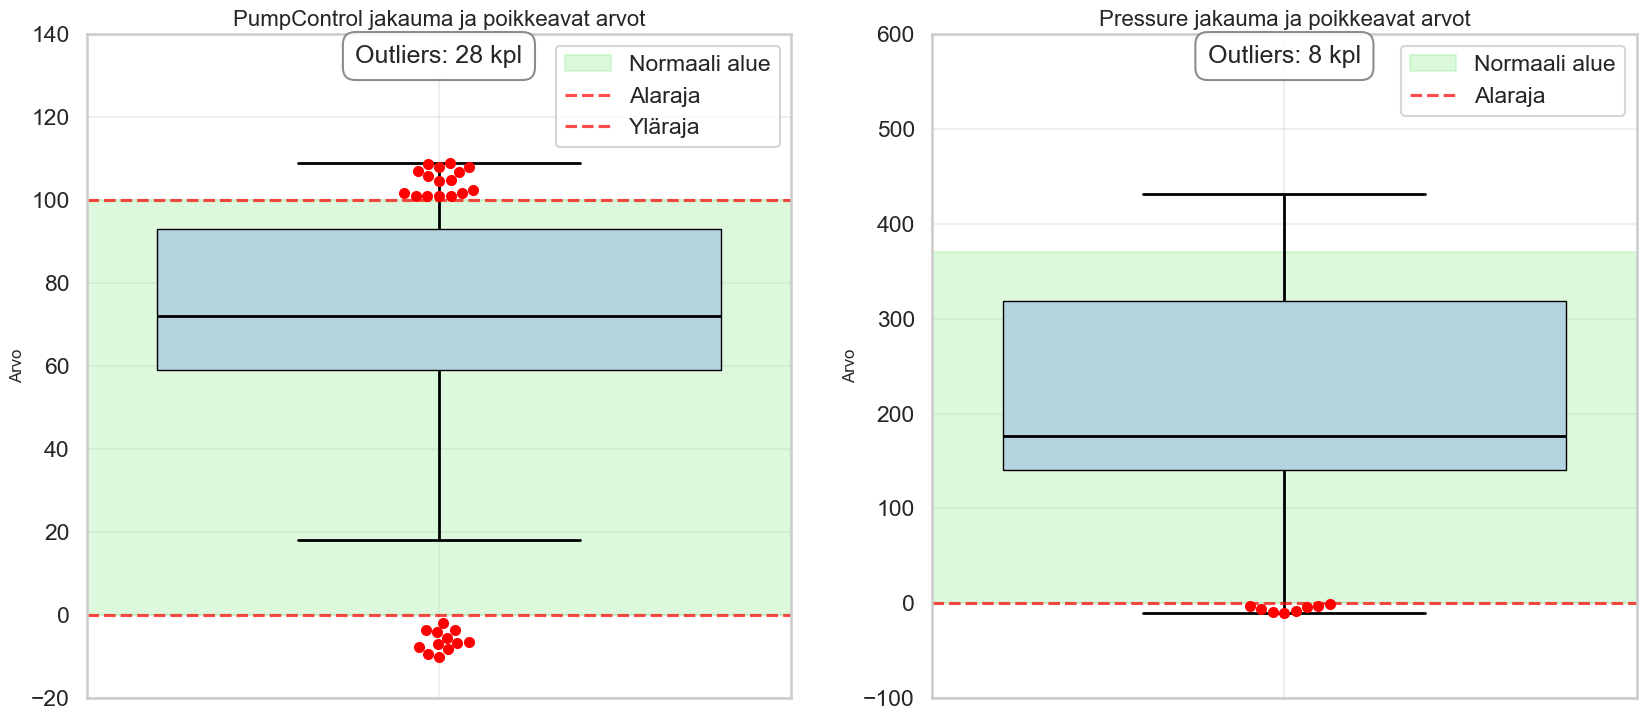

In [7]:
# Create figure with consistent size
plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# 2. PumpControl outlierit boxplot + swarmplot
ax2 = plt.subplot(gs[1, 0])  # Vasemmalle alhaalla

# Increase bottom margin
plt.subplots_adjust(bottom=0.15)

# Kiinteät rajat skaalalle
ymin, ymax = -20, 140
ax2.set_ylim(ymin, ymax)

# Määritä normaali alue
pump_normal = {'min': 0, 'max': 100}

# Piirrä boxplot
sns.boxplot(data=df['pumpControl'], ax=ax2, color='lightblue',
           medianprops=dict(color="black", linewidth=2),
           boxprops=dict(edgecolor="black"),
           whiskerprops=dict(color="black", linewidth=2),
           capprops=dict(color="black", linewidth=2),
           flierprops=dict(marker='None'))

# Piirrä swarmplot outlier-pisteille
outlier_mask = (df['pumpControl'] < 0) | (df['pumpControl'] > 100)
outlier_data = df[outlier_mask]['pumpControl']
sns.swarmplot(data=outlier_data, ax=ax2, color='red', size=8)

# Lisää normaali alue värillisenä alueena
ax2.axhspan(pump_normal['min'], pump_normal['max'],
           color='lightgreen', alpha=0.3, label='Normaali alue')

# Lisää sallitut rajat
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Alaraja')
ax2.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Yläraja')

# Lisää outlier-määrä tekstinä
pumpOutliers = len(outlier_data)
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.9)
text_y = ymax - (ymax - ymin) * 0.05  # 5% yläreunan alapuolelle
ax2.text(0, text_y, f'Outliers: {pumpOutliers} kpl', 
        ha='center', va='bottom', bbox=bbox_props)

ax2.set_title('PumpControl jakauma ja poikkeavat arvot', fontsize=16)
ax2.set_ylabel('Arvo', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# 3. Pressure outlierit boxplot + swarmplot
ax3 = plt.subplot(gs[1, 1])  # Oikealle alhaalla

# Increase bottom margin
plt.subplots_adjust(bottom=0.15)

# Kiinteät rajat skaalalle
ymin, ymax = -100, 600
ax3.set_ylim(ymin, ymax)

# Määritä normaali alue
pressure_normal = {'min': 0, 'max': df['pressure'].quantile(0.99)}

# Piirrä boxplot
sns.boxplot(data=df['pressure'], ax=ax3, color='lightblue',
           medianprops=dict(color="black", linewidth=2),
           boxprops=dict(edgecolor="black"),
           whiskerprops=dict(color="black", linewidth=2),
           capprops=dict(color="black", linewidth=2),
           flierprops=dict(marker='None'))

# Piirrä swarmplot outlier-pisteille
outlier_mask = (df['pressure'] < 0)
outlier_data = df[outlier_mask]['pressure']
sns.swarmplot(data=outlier_data, ax=ax3, color='red', size=8)

# Lisää normaali alue värillisenä alueena
ax3.axhspan(pressure_normal['min'], pressure_normal['max'],
           color='lightgreen', alpha=0.3, label='Normaali alue')

# Lisää sallitut rajat
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Alaraja')

# Lisää outlier-määrä tekstinä
pressureOutliers = len(outlier_data)
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.9)
text_y = ymax - (ymax - ymin) * 0.05  # 5% yläreunan alapuolelle
ax3.text(0, text_y, f'Outliers: {pressureOutliers} kpl', 
        ha='center', va='bottom', bbox=bbox_props)

ax3.set_title('Pressure jakauma ja poikkeavat arvot', fontsize=16)
ax3.set_ylabel('Arvo', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper right')

# Ylätason otsikko
fig.suptitle('Datan puhdistusta vaativat kohdat', fontsize=20, y=0.95)

# Tallennetaan kuvaaja
plt.savefig('../Visualization/corruptedOutliersValues.png', bbox_inches='tight', dpi=300)
print("Kuvaaja tallennettu ../Visualization/corruptedOutliersValues.png")
# Näytä kuvaaja
plt.show()

### 2.4 Yhteenveto datasta

In [8]:
print("\nYhteenveto datasta:")
print(f"- Rivejä yhteensä: {len(df)}")
print(f"- Puuttuvia arvoja: {df.isnull().sum().sum()}")
print(f"- PumpControl outlierit (<0 tai >100): {pumpOutliers}")
print(f"- Pressure outlierit (<0): {pressureOutliers}")


Yhteenveto datasta:
- Rivejä yhteensä: 10000
- Puuttuvia arvoja: 40
- PumpControl outlierit (<0 tai >100): 28
- Pressure outlierit (<0): 8
